<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# read file into pandas using a relative path. Please change the path as needed
import pandas as pd
product_df = pd.read_csv('/content/drive/MyDrive/AI/NLP/Submission/product_data.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/AI/NLP/Submission/reviews.csv')


## 1. Import Libraries

Let us check for the version of installed tensorflow.

In [3]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [4]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [5]:
product_df.head(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0000000,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.9500000,0.0000000
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7000000,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.9900000,0.0000000
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3000000,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0000000,0.0000000
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1000000,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.9900000,0.0000000


In [6]:
reviews_df.head(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000


Asin is common key between products and Reviews data frame.We'll consider Body Field to study sentiment

## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [7]:
reviews_df = reviews_df.drop(['date','helpfulVotes'],axis=1)

In [8]:
product_df = product_df.drop(['url','image','reviewUrl'],axis=1)

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [9]:
product_df.columns

Index(['asin', 'brand', 'title', 'rating', 'totalReviews', 'price',
       'originalPrice'],
      dtype='object')

In [10]:
product_df.dtypes
#Observations:
#Over here Rating is continuous number as it is averaged.


asin              object
brand             object
title             object
rating           float64
totalReviews       int64
price            float64
originalPrice    float64
dtype: object

In [11]:
reviews_df.dtypes

asin        object
name        object
rating       int64
verified      bool
title       object
body        object
dtype: object

In [12]:
product_df.describe(include='O')
#10 unique brands.Samsung is top brand.

,asin,brand,title
count,720,716,720
unique,720,10,718
top,B07NPRQYP1,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ..."
freq,1,346,2


In [13]:
product_df.describe()

,rating,totalReviews,price,originalPrice
count,720.0000000,720.0000000,720.0000000,720.0000000
mean,3.7137500,105.6791667,234.9489306,63.6907778
std,0.7160138,167.6011014,200.0084407,172.4053696
min,1.0000000,1.0000000,0.0000000,0.0000000
25%,3.3000000,7.0000000,97.5125000,0.0000000
50%,3.8000000,32.0000000,188.9750000,0.0000000
75%,4.1000000,122.2500000,336.7250000,0.0000000
max,5.0000000,983.0000000,999.9900000,999.9900000


In [14]:
reviews_df.describe()

,rating
count,67986.0000000
mean,3.8079163
std,1.5829058
min,1.0000000
25%,3.0000000
50%,5.0000000
75%,5.0000000
max,5.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

Reviews df - Total 720 ratings and totalReviews is also 720 done.
Price 0 seems to be invalid value.


### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

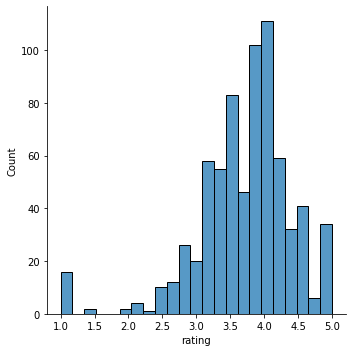

In [15]:
sns.displot(data= product_df,x='rating')
#Max reviews have rating near 4.Some products have low rating like 1.

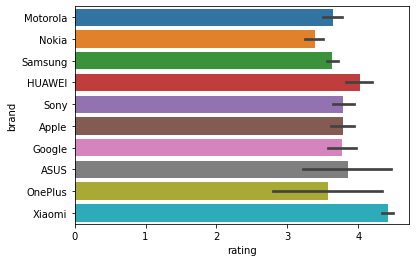

In [16]:
sns.barplot(data=product_df,x=product_df.rating,y='brand')
#Brand is a categorical feature so we go for Barplot.
#

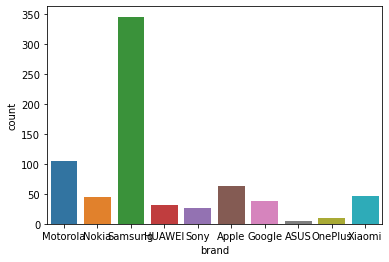

In [17]:
sns.countplot(product_df.brand);

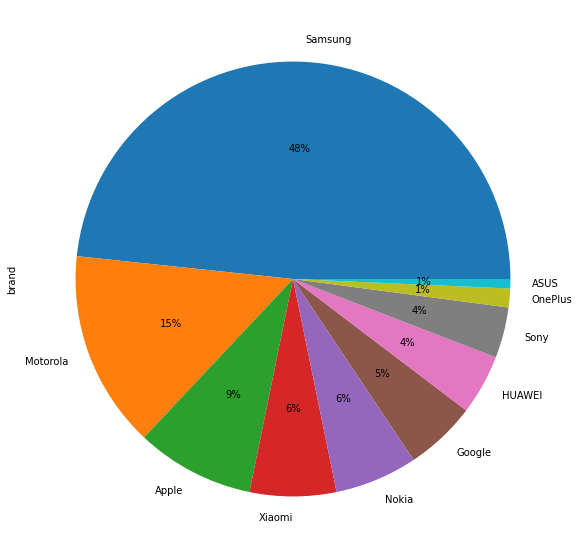

In [18]:
product_df['brand'].value_counts().plot(kind='pie', autopct = '%1.0f%%', figsize = (12,10))
#Samsung seems to have highest share

### 4.5 Display average rating per brand

In [19]:
# Calculating average rating per brand

rating_per_brand = product_df.groupby(by='brand')['rating'].count().sort_values(ascending=False)
rating_per_brand

brand
Samsung     346
Motorola    105
Apple        63
Xiaomi       46
Nokia        44
Google       38
HUAWEI       32
Sony         27
OnePlus      10
ASUS          5
Name: rating, dtype: int64

### 4.6 Display average price per brand

In [20]:
# Calculating average price per brand

price_per_brand = product_df.groupby(by='brand')['price'].mean().sort_values(ascending=False)
price_per_brand

brand
OnePlus    426.1960000
Sony       332.7248148
ASUS       309.6860000
Apple      303.5811111
Samsung    256.5272543
Google     241.8676316
HUAWEI     218.8290625
Xiaomi     214.9676087
Motorola   139.1210476
Nokia      111.4438636
Name: price, dtype: float64

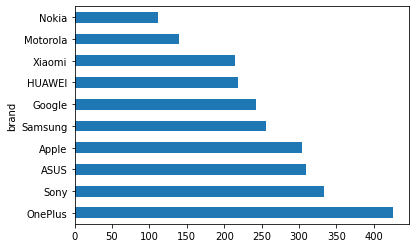

In [21]:
price_per_brand.plot(kind='barh')

### 4.7 Display average 'totalReviews' per brand

In [22]:
product_df.columns

Index(['asin', 'brand', 'title', 'rating', 'totalReviews', 'price',
       'originalPrice'],
      dtype='object')

In [23]:
Reviews_per_brand = product_df.groupby(by='brand')['totalReviews'].count().sort_values(ascending=False)
Reviews_per_brand

brand
Samsung     346
Motorola    105
Apple        63
Xiaomi       46
Nokia        44
Google       38
HUAWEI       32
Sony         27
OnePlus      10
ASUS          5
Name: totalReviews, dtype: int64

In [24]:
Reviews_per_brand = product_df.groupby(by='brand')['totalReviews'].mean().sort_values(ascending=False)
Reviews_per_brand
#Though highest number of reviews are for Samsung.But it seems in mean Nokia is highest.

brand
Nokia      140.5000000
Sony       122.6666667
Xiaomi     121.1739130
Google     111.5263158
Samsung    108.9624277
Apple      100.2380952
Motorola    89.7047619
HUAWEI      77.0937500
ASUS        52.6000000
OnePlus     40.6000000
Name: totalReviews, dtype: float64

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [25]:
reviews_df.shape

(67986, 6)

In [26]:
df = pd.merge(reviews_df, product_df,how ='left',left_on ='asin',right_on = 'asin')
#We would like to keep all rows in reviews_df so we keep it in left and do a left join.


In [27]:
df.shape
#Shape same as reviews df as we have kept reviews_df on left

(67986, 12)

In [28]:
df.sample(2)

,asin,name,rating_x,verified,title_x,body,brand,title_y,rating_y,totalReviews,price,originalPrice
17546,B013XAPUW6,Xavier Salas,4,True,the phone It's fine..,he arrived on time .. the phone It's fine ... ...,Samsung,"Samsung Galaxy Note 5, Black 64GB (Verizon Wi...",3.6000000,799,399.9900000,0.0000000
34712,B06Y3HCFZT,Emily,5,True,Love it.,Came in great condition. I love this phone! I'...,Samsung,"Samsung Galaxy S8+, 6.2"" 64GB (Verizon Wireles...",4.1000000,54,729.9900000,0.0000000


In [29]:
df.columns

Index(['asin', 'name', 'rating_x', 'verified', 'title_x', 'body', 'brand',
       'title_y', 'rating_y', 'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [30]:
df.rename(columns = {'rating_x':'user_rating','rating_y':'overall_rating','title_x' : 'review_title','title_y' : 'item_title'}, inplace = True)

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [31]:
df['verified'].value_counts()
#It seems we have substantial number of records for which Verfied is True.

True     61225
False     6761
Name: verified, dtype: int64

In [32]:
dff = df[df.verified==True]

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

In [33]:
# Calculating  the number of reviews for various brands 
reviews_brand = dff.groupby(by='brand')['totalReviews'].count().sort_values(ascending=False)
reviews_brand.head(1)

brand
Samsung    31020
Name: totalReviews, dtype: int64

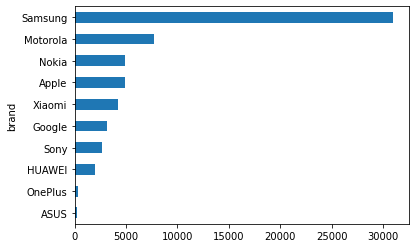

In [34]:
dff.groupby(by='brand')['totalReviews'].count().sort_values().plot(kind='barh')

In [35]:
dff.columns

Index(['asin', 'name', 'user_rating', 'verified', 'review_title', 'body',
       'brand', 'item_title', 'overall_rating', 'totalReviews', 'price',
       'originalPrice'],
      dtype='object')

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [36]:
#dff = df.drop(['brand','body','user_rating','review_title'],axis=1).Better approach to use below code
df_final = dff[['brand','body','price','user_rating','review_title']]
df_final.head(2)

,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

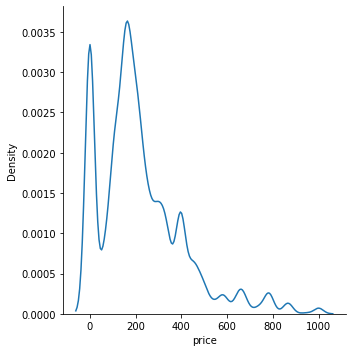

In [37]:
sns.displot(df_final['price'], kind = 'kde')
#Average is around 200.Data is right-skewed.

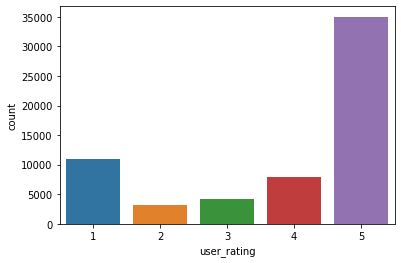

In [38]:
sns.countplot(df_final['user_rating'])
#For rating 5 there are maximum records

In [39]:
df_final['user_rating'].value_counts()

5    35001
1    10910
4     7938
3     4128
2     3248
Name: user_rating, dtype: int64

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (negative) if the user_Rating <= 3

In [40]:
df_final['sentiment'] = df["user_rating"].apply(lambda x:1 if x>3 else 0)

In [41]:
df_final['sentiment'].value_counts()
#Still seems to be biased distribution.Values 1 have higher count

1    42939
0    18286
Name: sentiment, dtype: int64

### 4.15 Check frequency distribution of the 'sentiment'

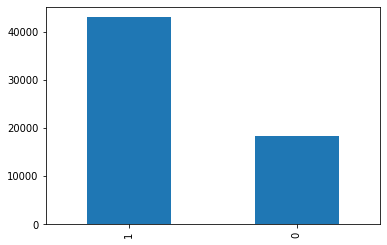

In [42]:
df_final['sentiment'].value_counts().plot(kind='bar')

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [43]:
pd.crosstab(df_final['brand'],df_final['sentiment'])

sentiment,0,1
brand,,
ASUS,69,137
Apple,1627,3249
Google,1011,2152
HUAWEI,366,1653
Motorola,2220,5494
Nokia,1904,2974
OnePlus,45,259
Samsung,9499,21521
Sony,879,1812


In [44]:
pd.crosstab(df_final['brand'],df_final['sentiment']).apply(lambda r:r/r.sum(),axis=1)
#Defined in terms of percentage.
#Almost all brands have higher positive sentiment.
#For brands Xiomi 15% is negative sentiment and 85% is positive sentiment

sentiment,0,1
brand,,
ASUS,0.3349515,0.6650485
Apple,0.3336751,0.6663249
Google,0.3196333,0.6803667
HUAWEI,0.1812779,0.8187221
Motorola,0.2877884,0.7122116
Nokia,0.3903239,0.6096761
OnePlus,0.1480263,0.8519737
Samsung,0.3062218,0.6937782
Sony,0.3266444,0.6733556


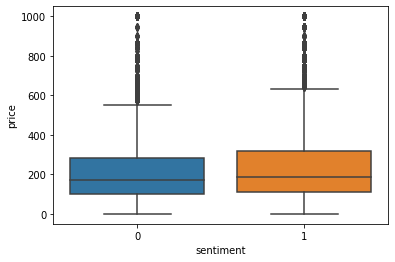

In [45]:
sns.boxplot(df_final['sentiment'],df_final['price'])
#Not much difference for sentiment based on Price.Price does not seem to influence on sentiment

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will peform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [46]:
import nltk

In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
df_final.columns

Index(['brand', 'body', 'price', 'user_rating', 'review_title', 'sentiment'], dtype='object')

In [49]:
df_final.iloc[0,1]
#We are trying to check 1st row and Body column(Index 1).
#It is in capital letters and has punctuation 

"DON'T BUY OUT OF SERVICE"

In [50]:
# This regex code can be used for cleaning .In case we want to remove numbers.Not used in this exercise.
import re, string

def clean_str(string):
  """
  String cleaning before vectorization
  """
  try:    
    string = re.sub(r'^https?:\/\/<>.*[\r\n]*!', '', string, flags=re.MULTILINE)
    string = re.sub(r"[^A-Za-z]", " ", string)         
    words = string.strip().lower().split()    
    words = [w for w in words if len(w)>=1]
    return " ".join(words)	
  except:
    return ""

#df_lower = df_final
#for index,row in df_final.iterrows():
#     str_lower = row['body']
#     df_lower['body'] = clean_str(str_lower)

In [51]:
df_final['keywords'] = df_final['body'].str.lower()
df_final['keywords'].head(5)

14                             don't buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good. i had used thi...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my at&t phone repla...
Name: keywords, dtype: object

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         61078 non-null  object 
 1   body          61207 non-null  object 
 2   price         61225 non-null  float64
 3   user_rating   61225 non-null  int64  
 4   review_title  61211 non-null  object 
 5   sentiment     61225 non-null  int64  
 6   keywords      61207 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ MB


In [53]:
#df_final['body'] = df_final['body'].str.replace('[^\w\s]','').This can also be removed to use punctuations

### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [54]:
df_final.columns

Index(['brand', 'body', 'price', 'user_rating', 'review_title', 'sentiment',
       'keywords'],
      dtype='object')

In [55]:
df_final.iloc[0,6]
#Check column keywords to see that lowercase conversion is done

"don't buy out of service"

In [56]:
import string
df_final['keywords'] = df_final['keywords'].str.translate(str.maketrans('', '', string.punctuation))
#This code removes punctuations

In [57]:
df_final.iloc[0,6]
#We see that ' has been removed .

'dont buy out of service'

In [58]:
df_final.iloc[30,6]


'this phone was the one my husband got when we first opened our cell account many years ago he is not open to change and i wasnt sure i could get this phone again i am very glad i was able to get it for him and it is working quite well thank you'

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [59]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [61]:
df_final['keywords'].head(2)

14                              dont buy out of service
17    1 star because the phones locked so i have to ...
Name: keywords, dtype: object

In [62]:
df_final['keywords'] = df_final['keywords'].astype(str)
df_final['keywords'] = df_final['keywords'].apply(lambda words: ' '.join(w for w in words.split() if w not in stop_words))
df_final['keywords'].head()
#For first row we can see that word 'out','of' are removed.These are stopwords

14                                     dont buy service
17      1 star phones locked pay additional fees unlock
18    product good used cell phone one projects work...
21    bought phone replace lg phone didnt like expec...
22    purchased phone att phone replacement even tho...
Name: keywords, dtype: object

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

Tried using Stemming and Lemmittization.

In [63]:
from nltk.stem import PorterStemmer

In [64]:
#Function to Stem words
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

In [65]:
df_final.iloc[30,6]

'phone one husband got first opened cell account many years ago open change wasnt sure could get phone glad able get working quite well thank'

In [66]:
#Stemming for first review
get_stemmed_text([df_final.iloc[0, 6]])

['dont buy servic']

In [67]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
df_final.columns

Index(['brand', 'body', 'price', 'user_rating', 'review_title', 'sentiment',
       'keywords'],
      dtype='object')

In [69]:
df_final.head(5)

,brand,body,price,user_rating,review_title,sentiment,keywords
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,0,dont buy service
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,0,1 star phones locked pay additional fees unlock
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product,1,product good used cell phone one projects work...
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but",1,bought phone replace lg phone didnt like expec...
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...,0,purchased phone att phone replacement even tho...


In [70]:
df_final.columns

Index(['brand', 'body', 'price', 'user_rating', 'review_title', 'sentiment',
       'keywords'],
      dtype='object')

In [71]:
y = df_final['sentiment']

In [72]:
#Using it with Lemmatized text
#vect = TfidfVectorizer()
#vect.fit(df_final['lemm'].tolist())
#len(vect.get_feature_names())

### 5.5 Check most common and rare words in the processed text
- We can also write a function to check word frequency of the text (Optional)

In [73]:
from collections import Counter
cnt = Counter()
for text in df_final["keywords"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('phone', 74437),
 ('great', 16983),
 ('good', 13411),
 ('battery', 11639),
 ('screen', 10374),
 ('like', 10359),
 ('one', 10031),
 ('new', 9477),
 ('use', 8755),
 ('get', 7566)]

In [74]:
rare_words = 10
cnt.most_common()[:-rare_words-1:-1]
#Taking words from last

[('prontoen', 1),
 ('500500', 1),
 ('sd730g', 1),
 ('s10’s', 1),
 ('phone🤩', 1),
 ('nois', 1),
 ('tomuch', 1),
 ('instructivo', 1),
 ('confirmen', 1),
 ('intrligente', 1)]

### 5.6 Initialize tf-idf vectorizer and transform the preprocessed body text

In [75]:
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

In [76]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [77]:

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df_final['lemm'] = df_final['keywords'].apply(lemmatize_text)
df_final['lemm'].head()

14                                 [dont, buy, service]
17    [1, star, phone, locked, pay, additional, fee,...
18    [product, good, used, cell, phone, one, projec...
21    [bought, phone, replace, lg, phone, didnt, lik...
22    [purchased, phone, att, phone, replacement, ev...
Name: lemm, dtype: object

In [78]:
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

In [79]:
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(2,2))

In [80]:
tfidf = tfidf_vectorizer.fit_transform(df_final["keywords"])

### 5.7 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [81]:
tfidf = tfidf_vectorizer.fit_transform(df_final["keywords"])

### 5.9 Split the data into Train & Test Sets

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(tfidf, y, random_state = 50, stratify=y, test_size=0.3)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train, y1_train)
print(rf_clf1.score(X_train, y1_train))
print(rf_clf1.score(X_test, y1_test))

0.9958233194110647
0.8871406794425087


For training accuracy seems to very high approx 99 %.While for validation it around 88%.This seems to be case of Overfitting

In [84]:
tfidf.get_shape()

(61225, 38355)

In [85]:
from sklearn.metrics import confusion_matrix
y1_pred = rf_clf1.predict(X_train)
confusion_matrix(y1_train, y1_pred)

array([[12639,   161],
       [   18, 30039]])

There seem to be roughly 180 records which have been mis-classified.

## 7. Write your conclusion

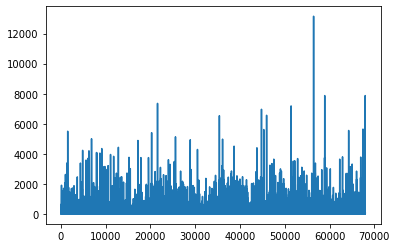

In [86]:
df_final["len"] =df_final["keywords"].str.len()
df_final["len"].plot()
#There seems to be reviews which are very long

This seems to be overfit model.
Different possibilitied which could be tried out for optimisation:
1.Merging brand and other features and then doing sentiment analysis
2.Try different factorizers
3.Lemmitize more features
4.More features could be used in Vectorizer.
5.We could look at removing rare words.
6.Review length being shortend could be looked at.

##. 8. Further Explore
### 8.0 Merge all independent features and the below text preprocessing steps
### 8.1 Check rare words and drop them
### 8.2 Remove emoticon/emojis
### 8.3 Try different vectorizer for vectorization
### 8.4 Use embeddings
### 8.5 Use NN based models